In [ ]:
https://www.amazon.in/dp/B0B7DVC3TL#customerReviews

In [1]:
import requests # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content
import re # regular expressions
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import string
import spacy

In [17]:
bag_review=[]

In [19]:
for i in range(1,200):
  ip=[]  

  url = "https://www.amazon.in/product-reviews/B0B7DVC3TL/ref=cm_cr_arp_d_show_all?ie=UTF8&reviewerType=all_reviews&pageNumber=1#reviews-filter-bar"+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
  # Extracting the content under specific tags  
# Extracting the content under specific tags    
for i in range(len(reviews)):
    ip.append(reviews[i].text)   
bag_review=bag_review+ip

In [20]:
review=pd.DataFrame(bag_review)
review

,0
0,\nLess space in the bag and only one compartme...
1,"\nReally Nice bag for the students, good quali..."
2,"\nNice bag, fabric seems good but not Very Spe..."
3,"\nColor, space, zip everything is ok as per or..."
4,\nThe quality of bag is good. It has too money...
5,\nPerfect for carrying laptop. Extra cushion h...
6,\nExcellent product\n
7,\nSatisfied..best at this price..value of mone...
8,\nFor a long time I had been finding a bag wit...
9,\nWorth buying.nice comfort\n


In [21]:
review.columns=['review']
review

,review
0,\nLess space in the bag and only one compartme...
1,"\nReally Nice bag for the students, good quali..."
2,"\nNice bag, fabric seems good but not Very Spe..."
3,"\nColor, space, zip everything is ok as per or..."
4,\nThe quality of bag is good. It has too money...
5,\nPerfect for carrying laptop. Extra cushion h...
6,\nExcellent product\n
7,\nSatisfied..best at this price..value of mone...
8,\nFor a long time I had been finding a bag wit...
9,\nWorth buying.nice comfort\n


In [22]:
affin=pd.read_csv('Afinn.csv', sep = ',',encoding='latin-1')
affin.shape

(2477, 2)

In [24]:
data= [review.strip() for review in review.review]#removing blank spaces
data= [review for review in data if review]#removing black lines
data

['Less space in the bag and only one compartment have more space remain have  less space',
 'Really Nice bag for the students, good quality and quality also, worth of money. Thank you Amazon🙏.',
 'Nice bag, fabric seems good but not Very Specious, overall to buy not a bad deal',
 'Color, space, zip everything is ok as per ordered item description. Quality product and spacious for solo short traveling.',
 'The quality of bag is good. It has too money pockets and 1 for laptop sleeve. It also provides rain cover at bottom pocket. Zipper are of good quality but it does not feel premium.Only thing that i didn\'t like is Straps. They feel wide to me and not long enough to cover my a**. My height is 5\'10" and I like to hang my bag as lowest possible. This bag only reaches just below my waist.At this price I think this is good fit.',
 'Perfect for carrying laptop. Extra cushion has been provided at bottom. Zipper quality is also awesome. Only problem is rain cover is not completely able prote

In [26]:
#tokenizing
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences[0:15]

['Less space in the bag and only one compartment have more space remain have  less space Really Nice bag for the students, good quality and quality also, worth of money.',
 'Thank you Amazon🙏.',
 'Nice bag, fabric seems good but not Very Specious, overall to buy not a bad deal Color, space, zip everything is ok as per ordered item description.',
 'Quality product and spacious for solo short traveling.',
 'The quality of bag is good.',
 'It has too money pockets and 1 for laptop sleeve.',
 'It also provides rain cover at bottom pocket.',
 "Zipper are of good quality but it does not feel premium.Only thing that i didn't like is Straps.",
 'They feel wide to me and not long enough to cover my a**.',
 'My height is 5\'10" and I like to hang my bag as lowest possible.',
 'This bag only reaches just below my waist.At this price I think this is good fit.',
 'Perfect for carrying laptop.',
 'Extra cushion has been provided at bottom.',
 'Zipper quality is also awesome.',
 'Only problem is rain

In [27]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df[0:20]

,sentence
0,Less space in the bag and only one compartment...
1,Thank you Amazon🙏.
2,"Nice bag, fabric seems good but not Very Speci..."
3,Quality product and spacious for solo short tr...
4,The quality of bag is good.
5,It has too money pockets and 1 for laptop sleeve.
6,It also provides rain cover at bottom pocket.
7,Zipper are of good quality but it does not fee...
8,They feel wide to me and not long enough to co...
9,"My height is 5'10"" and I like to hang my bag a..."


In [28]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\NALLI
[nltk_data]     NISHETHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\NALLI
[nltk_data]     NISHETHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
my_stopwords = stopwords.words('english')
my_stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [32]:
affinity_scores = affin.set_index('word')['value'].to_dict() 

In [33]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        clean = nlp(text)
        for word in clean:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [34]:
calculate_sentiment(text = 'amazing')

4

In [35]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment) 

In [36]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10) 

0    30
1     3
2    27
3     8
4     6
5    10
6     8
7    18
8    13
9    14
Name: word_count, dtype: int64

In [37]:
sent_df.sort_values(by='sentiment_value').head(10)

,sentence,sentiment_value,word_count
32,Only problem is rain cover is not completely a...,-1,16
14,Only problem is rain cover is not completely a...,-1,16
21,Quality product and spacious for solo short tr...,0,8
24,It also provides rain cover at bottom pocket.,0,8
26,They feel wide to me and not long enough to co...,0,13
12,Extra cushion has been provided at bottom.,0,7
8,They feel wide to me and not long enough to co...,0,13
23,It has too money pockets and 1 for laptop sleeve.,0,10
6,It also provides rain cover at bottom pocket.,0,8
5,It has too money pockets and 1 for laptop sleeve.,0,10


In [38]:
sent_df['sentiment_value'].describe()

count    37.000000
mean      2.810811
std       2.904382
min      -1.000000
25%       0.000000
50%       3.000000
75%       4.000000
max      12.000000
Name: sentiment_value, dtype: float64

In [40]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']>=0].head() 

,sentence,sentiment_value,word_count
0,Less space in the bag and only one compartment...,8,30
1,Thank you Amazon🙏.,2,3
2,"Nice bag, fabric seems good but not Very Speci...",3,27
3,Quality product and spacious for solo short tr...,0,8
4,The quality of bag is good.,3,6


In [43]:
sent_df[sent_df['sentiment_value']>=10].head() 

,sentence,sentiment_value,word_count
18,Worth buying.nice comfort Less space in the ba...,12,33


In [44]:
sent_df['index']=range(0,len(sent_df)) 

In [45]:
sent_df

,sentence,sentiment_value,word_count,index
0,Less space in the bag and only one compartment...,8,30,0
1,Thank you Amazon🙏.,2,3,1
2,"Nice bag, fabric seems good but not Very Speci...",3,27,2
3,Quality product and spacious for solo short tr...,0,8,3
4,The quality of bag is good.,3,6,4
5,It has too money pockets and 1 for laptop sleeve.,0,10,5
6,It also provides rain cover at bottom pocket.,0,8,6
7,Zipper are of good quality but it does not fee...,5,18,7
8,They feel wide to me and not long enough to co...,0,13,8
9,"My height is 5'10"" and I like to hang my bag a...",2,14,9


C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

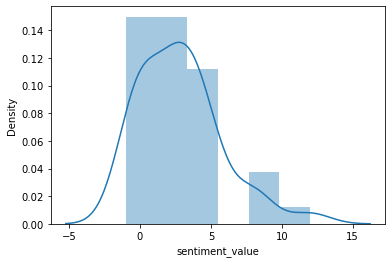

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

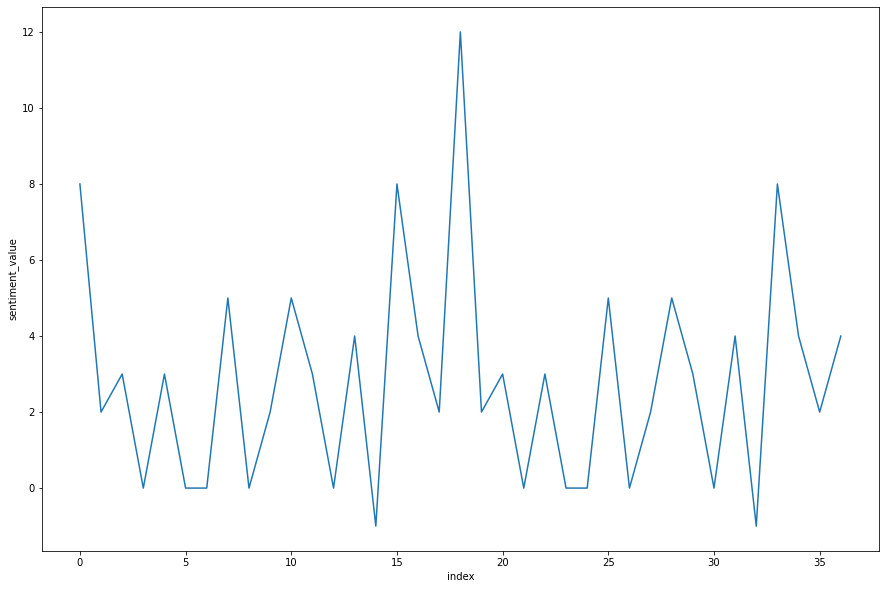

In [47]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

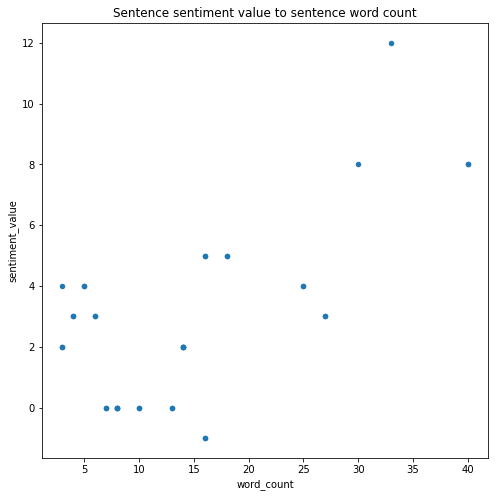

In [48]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')